# 12 Drams of Christmas Analysis

Step 1 is just to load the data and clean it up a bit. The data is just acquired from the google spreadsheet, then 'file', 'save as csv'.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# some plotting config:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [15, 10]
# load data
dram_data = pd.read_csv('12 Drams - 2021 - Sheet1.csv')
# get rid of total score
dram_data = dram_data.drop(columns ='Total Score')
# rearrange the data into a format more amenable for plotting:
dram_data = pd.melt(dram_data, id_vars=["Drammer", "Day", "Dram"], var_name='Dramee')
# get rid of non-numeric values:
# first try and convert all scores to numeric data
dram_data.value =pd.to_numeric(dram_data.value, errors='coerce')
# get rid of all nan values:
dram_data = dram_data[dram_data['value'].notna()]
dram_data = dram_data[dram_data['Drammer'].notna()]
# finally, because names are can be too trim them
dram_data.Dram = dram_data.Dram.apply(lambda x: x[0:5])
dram_data.Dramee = dram_data.Dramee.apply(lambda x: x[0:9])

Now the data is in an ameneable formats, let's make a few plots:

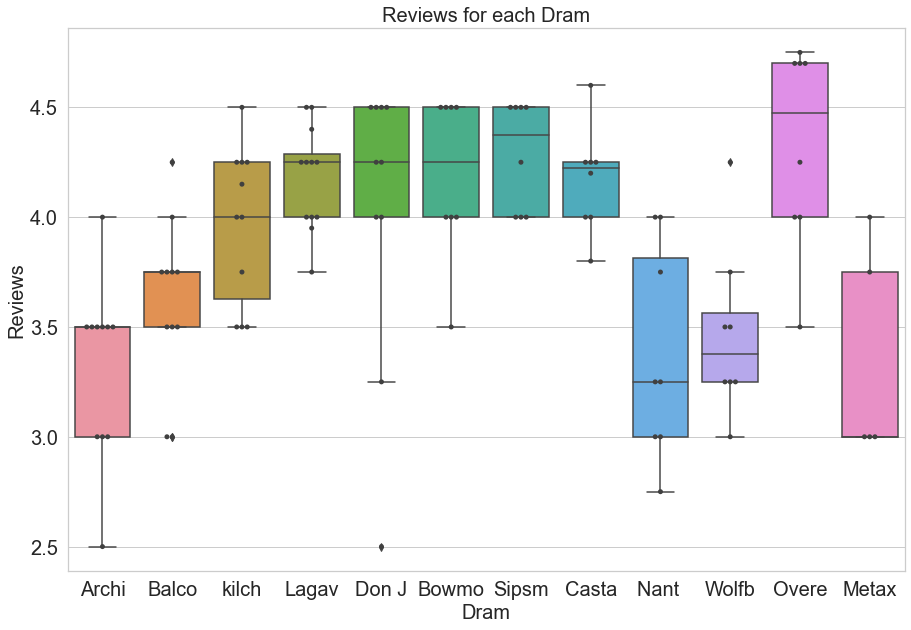

In [7]:
# distribution of each drams reviews
plt.figure()
ax = sns.boxplot(data=dram_data, x='Dram', y='value')
ax = sns.swarmplot(x="Dram", y="value", data=dram_data, color=".25")
ax.set_xlabel('Dram', fontsize=20)
ax.set_ylabel('Reviews', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('Reviews for each Dram', fontsize=20)
plt.show()

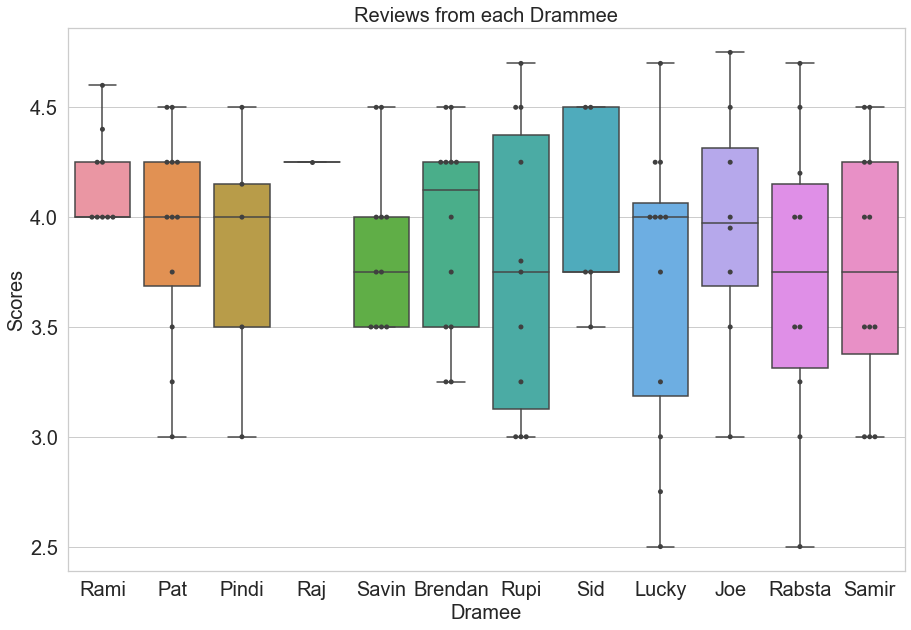

In [8]:
# distribution of each persons reviews
plt.figure()
ax = sns.boxplot(data=dram_data, x='Dramee', y='value')
ax = sns.swarmplot(x="Dramee", y="value", data=dram_data, color=".25")
ax.set_title('Reviews from each Drammee', fontsize=20)
ax.set_ylabel('Scores', fontsize=20)
ax.set_xlabel('Dramee', fontsize=20)
ax.tick_params(labelsize=20)
plt.show()

## All scores

Let's have a quick look at the scores from every person. First we need to rearrange the data again:

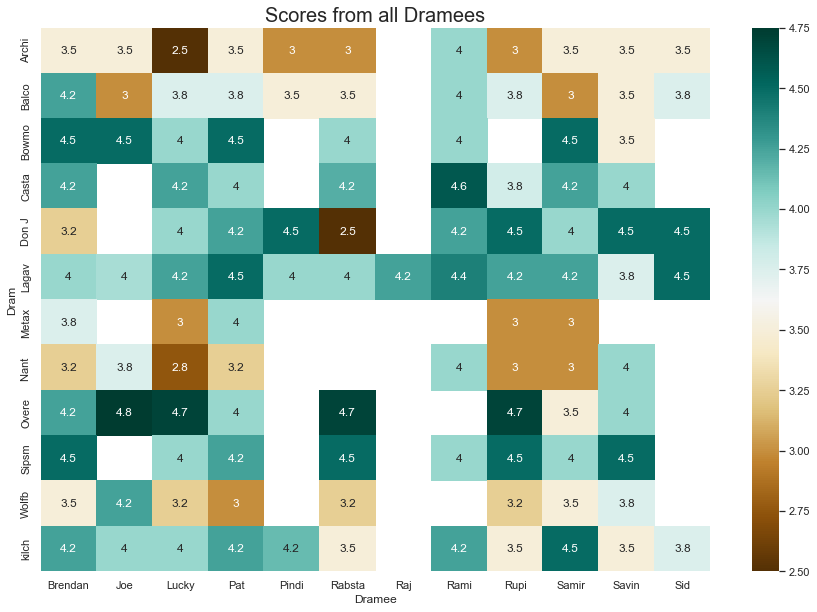

In [9]:
# need to rearrange data again to make life easier
dram_data2 = dram_data.pivot(index='Dramee', columns='Dram', values='value').T


plt.figure()
ax = sns.heatmap(dram_data2, annot=True, cmap='BrBG')
ax.set_title('Scores from all Dramees', fontsize=20)
plt.show()

## Correlation matrix

Finally, we can figure out the correlation between each dramee and every other dramee. 
This matrix indicates those who are likely to be best buds and should go drinking together (high correlation) and those who may come to blows if they are ever in the same room (low correlation). Note that the diagnoal entries are always 1; there is perfect correlation of each persons scores with their own scores. (except where the scores haven't been filled out!)  
Also not that there's really not enough data for any of this to mean anything :-P

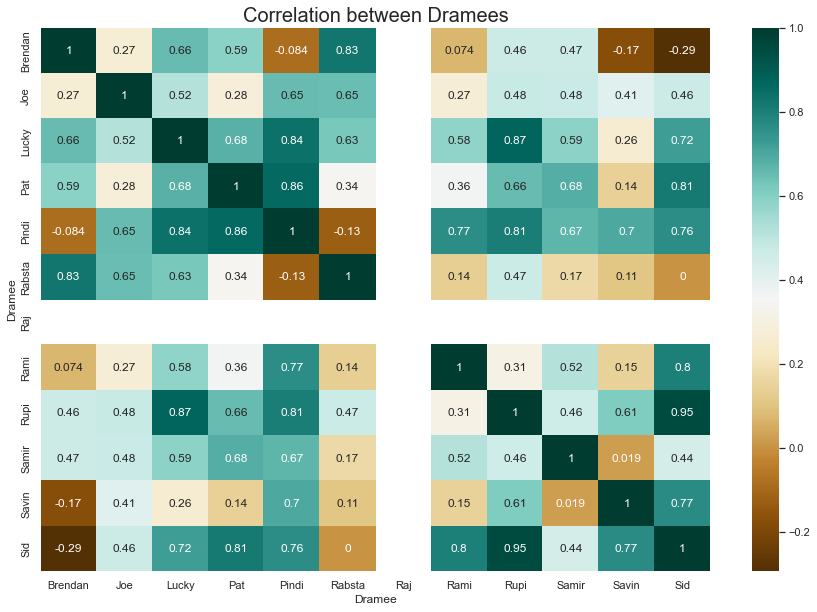

In [10]:
correlation_matrix = dram_data2.corr()
plt.figure()
ax = sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
ax.set_title('Correlation between Dramees', fontsize=20)
plt.show()